In [73]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Lesson 3

2) Use basic Python operators to find the number of seconds in the month of June. Find the
number of seconds that have lapsed between 1 June at noon and 14 Aug, 9:30 AM.

In [74]:
number_sec_in_day = 24 * 60 * 60

In [75]:
number_sec_in_june = 30 * number_sec_in_day

In [76]:
number_sec_in_june

2592000

In [77]:
aug_sec = ((((13 * 24) + 9) * 60) + 30) * 60
jul_sec = 31 * 24 * 60 * 60
jun_sec = ((29 * 24) + 12) * 60 * 60
sec_between = aug_sec + jul_sec + jun_sec 
sec_between

6384600

3) Find the following

a. The population in 2015

b. The population growth between 1950 (beginning of dataset) and 2015

c. The annual growth rates over the course of the dataset

In [78]:
world_pop = Table.read_table('world_population.csv')
world_pop

Population,Year
2557628654,1950
2594939877,1951
2636772306,1952
2682053389,1953
2730228104,1954
2782098943,1955
2835299673,1956
2891349717,1957
2948137248,1958
3000716593,1959


In [79]:
print("The population int 2015 is", int(world_pop.where("Year", 2015).column("Population")))

The population int 2015 is 7256490011


In [80]:
pop_1950 = int(world_pop.where("Year", 1950).column("Population"))
pop_2015 = int(world_pop.where("Year", 2015).column("Population"))
pop_growth = pop_2015 / pop_1950 - 1
pop_growth

1.8371945237832796

In [81]:
annual_growth = np.empty(66)
for i in range(1950, 2014, 1):
    growth = world_pop.where("Year", i + 1).column('Population') / world_pop.where("Year", i).column('Population')
    annual_growth[i - 1950] = growth
annual_growth
world_pop.with_column("Annual Growth", annual_growth)

Population,Year,Annual Growth
2557628654,1950,1.01459
2594939877,1951,1.01612
2636772306,1952,1.01717
2682053389,1953,1.01796
2730228104,1954,1.019
2782098943,1955,1.01912
2835299673,1956,1.01977
2891349717,1957,1.01964
2948137248,1958,1.01783
3000716593,1959,1.01409


4) The ‘Titanic’ dataset describes passengers on the Titanic when it sank. Url:
https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv.
Information about this dataset can be found at a kaggle site
(https://www.kaggle.com/c/titanic). Import this dataset and answer the following
questions:

a. Relabel the ‘Pclass’ column to ‘passenger_class’.

b. Create a new column ‘family_size’ that adds the number of siblings/spouses,
‘SibSp’, to the number of children, ‘Parch’.

c. Create a barplot of number of passengers, broken down by passenger class.
HINT: you will need to use the group method on the dataset; for more info, see
the datascience package help.

d. Sort the data by age and show the youngest 5 passengers.

e. Now sort by age from oldest to youngest and show the oldest 5 passengers.
What did you notice? Eliminate these “nan” values and try again.

f. Find the survival rate for passengers of the Titanic, broken down by passenger
class. (HINT: select the columns you care about and then apply the group
method, summarizing with the mean.)

g. Now that you have some familiarity with the dataset, create two of your own
questions and answer them.

In [82]:
titanic = Table.read_table('https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv')
titanic

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


In [83]:
titanic = titanic.relabeled('Pclass', 'passenger_class')
titanic

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


In [84]:
family_size = titanic.column('SibSp') + titanic.column('Parch')
titanic = titanic.with_column('family_size', family_size)
titanic

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


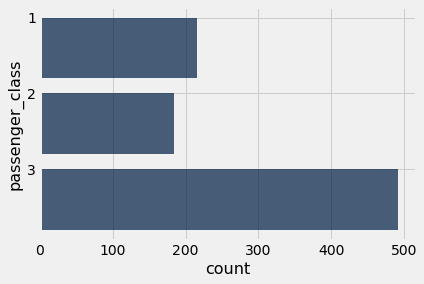

In [85]:
passenger_class_count = titanic.group('passenger_class')
passenger_class_count.barh('passenger_class', 'count')

In [86]:
age_sort = titanic.sort('Age')
age_sort.show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


In [87]:
age_sort_old = titanic.sort('Age', descending=True)
age_sort_old.show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,nan,S,3
879,0,3,"Laleff, Mr. Kristo",male,nan,0,0,349217,7.8958,nan,S,0
869,0,3,"van Melkebeke, Mr. Philemon",male,nan,0,0,345777,9.5,nan,S,0
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,nan,8,2,CA. 2343,69.55,nan,S,10
860,0,3,"Razi, Mr. Raihed",male,nan,0,0,2629,7.2292,nan,C,0


In [88]:
age_sort_old.where('Age', are.below(200)).show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


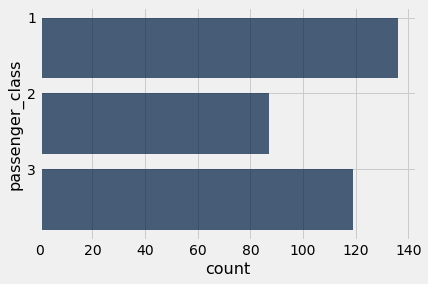

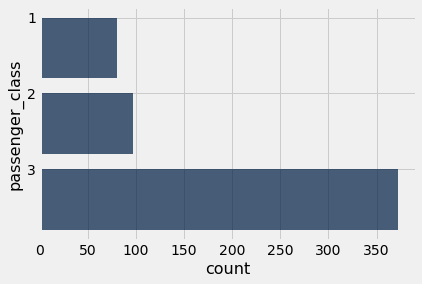

In [89]:
dead = titanic.column('Survived') +  1
for i in range(891):
    if dead[i] == 2:
        dead[i] = 0
titanic = titanic.with_column("died", dead)
class_survived = titanic.groups(["passenger_class", "Survived"]).where("Survived", are.equal_to(1))
class_survived.barh("passenger_class", "count", label="Survived")
class_died = titanic.groups(["passenger_class", "died"]).where("died", are.equal_to(1))
class_died.barh("passenger_class", "count")

How many Females to males survived

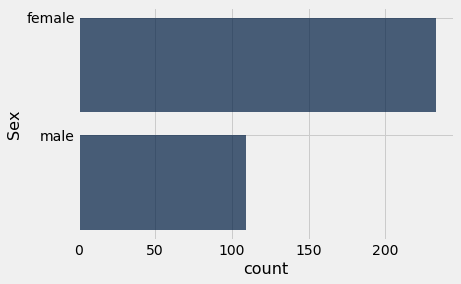

In [90]:
female_male = titanic.groups(["Sex","Survived"]).where("Survived", are.equal_to(1))
female_male.barh("Sex", "count")

Did Larger Families have a better chance of surviving

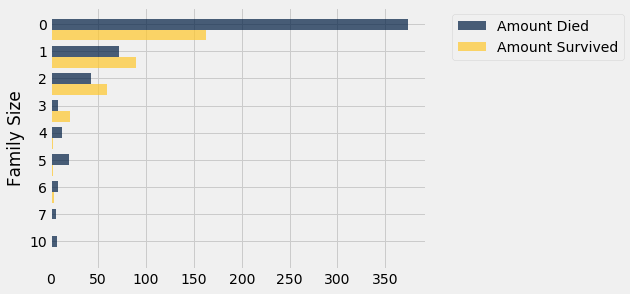

In [113]:
family_died = titanic.groups(["family_size","died"])
count_died = family_died.where("died", are.equal_to(1)).column("count")
count_alive = family_died.where("died", 0).column("count")
family = Table().with_columns("Family Size", make_array(0, 1, 2, 3, 4, 5, 6, 7, 10), 'Amount Died', count_died, 'Amount Survived', make_array( 163, 89, 59, 21, 3, 3, 4, 0, 0))
family.barh("Family Size")

